# Example of using the SSBD-OMERO API

In [54]:
# pip install requests
import requests

SSBD_BASE_URL = "http://ssbd.qbic.riken.jp/image"

# Check a HTTP session to SSBD-OMERO using the requests library

In [55]:
url = "%s/webclient" % SSBD_BASE_URL

if requests.session().get(url).status_code == 200:
    print("Successfully connected to OMERO")

print(url)

Successfully connected to OMERO
http://ssbd.qbic.riken.jp/image/webclient


# Get image 

In [56]:
from IPython.display import display, HTML

IMAGE_ID = 37051
TMP_URL = "{base}/webgateway/render_image/{image_id}/0/0/"
qs = {'base': SSBD_BASE_URL, 'image_id': IMAGE_ID}

url = TMP_URL.format(**qs)
display(HTML("<img src='%s' />" % url))
print(url)

http://ssbd.qbic.riken.jp/image/webgateway/render_image/37051/0/0/


# Get image ROI

In [57]:
TMP_URL = "{base}/webgateway/render_image_region/{image_id}/{z}/{t}/?region=0,100,50,50"
qs = {'base': SSBD_BASE_URL, 'image_id': IMAGE_ID, 'z': Z, 't': T}
url = TMP_URL.format(**qs)

display(HTML("<img src='%s' />" % url))
print(url)

http://ssbd.qbic.riken.jp/image/webgateway/render_image_region/37051/0/675/?region=0,100,50,50


# Binalize image using its annotation

('ProjectName', u'Ce_Ca_TJ')
('X:', 256)
('Y:', 256)
('Z:', 1)
('T:', 1350)
('C:', 1)
('PixelsType:', u'uint8')
255


<IPython.core.display.Javascript object>


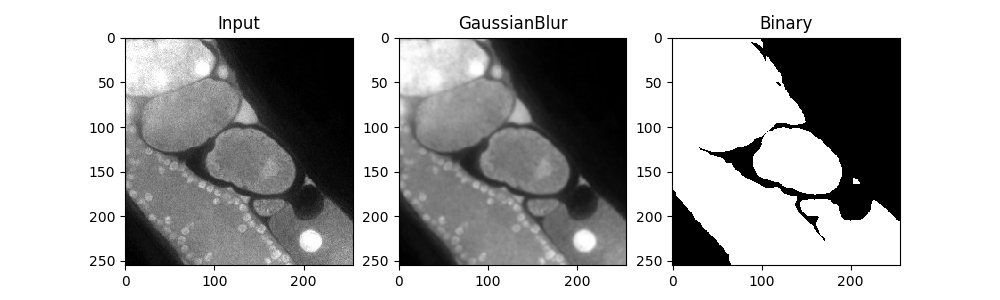

http://ssbd.qbic.riken.jp/image/webgateway/render_image/37051/0/675/


In [73]:
# pip install opencv-python
import sys
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib notebook

IMAGE_ID = 37051

TMP_URL = "{base}/webclient/imgData/{image_id}/"
qs = {'base': SSBD_BASE_URL, 'image_id': IMAGE_ID}
url = TMP_URL.format(**qs)

r = requests.session().get(url)
if r.status_code != 200:
    print("error")
    sys.exit()

a = r.json()
print ("ProjectName", a['meta']['projectName'])
print ("X:", a['size']['width'])
print ("Y:", a['size']['height'])
print ("Z:", a['size']['z'])
print ("T:", a['size']['t'])
print ("C:", a['size']['c'])
print ("PixelsType:", a['meta']['pixelsType'])
print (a['pixel_range'][1])

Z = int(a['size']['z']/2)
T = int(a['size']['t']/2)
pixel_range = a['pixel_range'][1]

TMP_URL = "{base}/webgateway/render_image/{image_id}/{z}/{t}/"
qs = {'base': SSBD_BASE_URL, 'image_id': IMAGE_ID, 'z': Z, 't': T}
url = TMP_URL.format(**qs)

r = requests.session().get(url)
if r.status_code != 200:
    print("error")
    sys.exit()

# PIL(RGB) -> OpenCV (BGR)
cv_img0 = cv2.cvtColor(np.array(Image.open(BytesIO(r.content))), cv2.COLOR_RGB2BGR)
# Filterd
cv_img1 = cv2.GaussianBlur(cv_img0, (5,5), 0)
# Binalize
ret,cv_img2 = cv2.threshold(cv_img1,90,pixel_range,cv2.THRESH_BINARY)

plt.figure(figsize=(10,3))
plt.subplot(1,3,1),plt.imshow(Image.fromarray(cv_img0))
plt.title('Input')
plt.subplot(1,3,2),plt.imshow(Image.fromarray(cv_img1))
plt.title('GaussianBlur')
plt.subplot(1,3,3),plt.imshow(Image.fromarray(cv_img2))
plt.title('Binary')
plt.savefig('opencv.tiff')
print(url)


# Get image thumbnail

In [74]:
from IPython.display import display, HTML

IMAGE_ID = 37051
TMP_URL = "{base}/webgateway/render_thumbnail/{image_id}/{size}/"
qs = {'base': SSBD_BASE_URL, 'image_id': IMAGE_ID, 'size': 100}

url = TMP_URL.format(**qs)
display(HTML("<img src='%s' />" % url))
print(url)

http://ssbd.qbic.riken.jp/image/webgateway/render_thumbnail/37051/100/


# Get shortcut URLs of image

In [75]:
IMAGE_ID = 1
IMAGE_URL = "{base}/webclient/?show=image-{image_id}"
IMAGE_VIEWER = "{base}/webclient/img_detail/{image_id}/"
THUMBNAIL_URL = "{base}/webclient/render_thumbnail/{image_id}/"
ATTRIBUTES_URL = "{base}/webclient/api/annotations/?type=map&image={image_id}"

print('Image link:', IMAGE_URL.format(**{'base': SSBD_BASE_URL, 'image_id': IMAGE_ID}))
print('Image viewer link:', IMAGE_VIEWER.format(**{'base': SSBD_BASE_URL, 'image_id': IMAGE_ID}))
print('Thumbnail URL:', THUMBNAIL_URL.format(**{'base': SSBD_BASE_URL, 'image_id': IMAGE_ID}))

('Image link:', 'http://ssbd.qbic.riken.jp/image/webclient/?show=image-1')
('Image viewer link:', 'http://ssbd.qbic.riken.jp/image/webclient/img_detail/1/')
('Thumbnail URL:', 'http://ssbd.qbic.riken.jp/image/webclient/render_thumbnail/1/')


# Get image annotation

In [76]:
IMAGE_ID = 35063
TMP_URL = "{base}/webclient/imgData/{image_id}/"
qs = {'base': SSBD_BASE_URL, 'image_id': IMAGE_ID}

url = TMP_URL.format(**qs)
r = requests.session().get(url)
if r.status_code == 200:
    a = r.json()
    print (a)
    print ("X:", a['size']['width'])
    print ("Y:", a['size']['height'])
    print ("Z:", a['size']['z'])
    print ("T:", a['size']['t'])
    print ("C:", a['size']['c'])
    print ("PixelsType:", a['meta']['pixelsType'])
print(url)

{u'init_zoom': 0, u'tiles': False, u'perms': {u'canAnnotate': False, u'canEdit': False, u'canDelete': False, u'canLink': False}, u'split_channel': {u'c': {u'width': 1206, u'border': 2, u'gridy': 1, u'gridx': 2, u'height': 604}, u'g': {u'width': 604, u'border': 2, u'gridy': 1, u'gridx': 1, u'height': 604}}, u'rdefs': {u'defaultT': 0, u'model': u'greyscale', u'defaultZ': 33, u'invertAxis': False, u'projection': u'normal'}, u'pixel_range': [0, 65535], u'interpolate': True, u'channels': [{u'color': u'808080', u'active': True, u'window': {u'max': 2538.0, u'min': 435.0, u'end': 2538.0, u'start': 435.0}, u'emissionWave': None, u'label': u'0'}], u'meta': {u'projectDescription': u'See details in Kyoda et al. (2013) Nucleic Acids Res 41, D732-D846', u'datasetName': u'wt_N2_030131_01', u'projectId': 1, u'wellSampleId': u'', u'projectName': u'Ce_KK_P002', u'imageDescription': u'See details in Kyoda et al. (2013) Nucleic Acids Res 41, D732-D851', u'imageId': 35063, u'imageAuthor': u'public data', u

# Get image key-value annotation

In [77]:
IMAGE_ID = 37051
TMP_URL = "{base}/webclient/api/annotations/?type=map&{type}={image_id}"
qs = {'base': SSBD_BASE_URL, 'type': 'image', 'image_id': IMAGE_ID}

url = TMP_URL.format(**qs)
for a in requests.session().get(url).json()['annotations']:
    print (a)
    namespace = a['ns']
    for v in a['values']:
        key = v[0]
        value = v[1]
        print (key, value)

print (url)

{u'id': 37005, u'owner': {u'id': 2}, u'link': {u'owner': {u'id': 2}, u'date': u'2016-10-02T12:29:37Z', u'id': 36652, u'parent': {u'class': u'ImageI', u'name': u'Fig1D_DMRE_110120-1.tif', u'id': 37051}, u'permissions': {u'canAnnotate': False, u'canEdit': False, u'canDelete': False, u'canLink': False}}, u'date': u'2016-10-02T12:29:37Z', u'values': [[u'License', u'CC BY-NC-SA'], [u'Contactname', u'Shuichi Onami'], [u'Organization', u'RIKEN'], [u'Department', u'Quantitative Biology Center'], [u'Laboratory', u'Laboratory for Developmental Dynamics'], [u'Contributers', u'Jun Takayama, Shuichi Onami'], [u'Organism', u'C. elegans'], [u'PubMedID', u'27068469']], u'ns': u'openmicroscopy.org/omero/client/mapAnnotation', u'class': u'MapAnnotationI', u'permissions': {u'canAnnotate': False, u'canEdit': False, u'canDelete': False, u'canLink': False}}
(u'License', u'CC BY-NC-SA')
(u'Contactname', u'Shuichi Onami')
(u'Organization', u'RIKEN')
(u'Department', u'Quantitative Biology Center')
(u'Laborator

# Get list of projects

In [78]:
TMP_URL = "{base}/webgateway/proj/list"
qs = {'base': SSBD_BASE_URL }

url = TMP_URL.format(**qs)
for a in requests.session().get(url).json():
    print (a)
    print (a['id'], a['name'])

print(url)

{u'description': u'See details in Ochiai et al. (2015) Nucleic Acids Research, 43(19): e127', u'name': u'Mmu_MS2_OH', u'id': 201}
(201, u'Mmu_MS2_OH')
{u'description': u'See details in Takayama and Onami. (2016) Cell Reports, 15(3), 625-637', u'name': u'Ce_Ca_TJ', u'id': 151}
(151, u'Ce_Ca_TJ')
{u'description': u'See details in Kyoda et al. (2013) Nucleic Acids Res 41, D732-D846', u'name': u'Ce_KK_P002', u'id': 1}
(1, u'Ce_KK_P002')
{u'description': u'See details in Watabe et al. (2015) PLoS One, 10(7): e0130089', u'name': u'MIX_LSCM_WM', u'id': 51}
(51, u'MIX_LSCM_WM')
{u'description': u'See details in Harima et al. (2013) Cell Reports, 3(1): 1-7', u'name': u'Mmu_PSM_KR', u'id': 52}
(52, u'Mmu_PSM_KR')
{u'description': u'See details in Toyoshima et al. (2016) PLoS Computational Biology, 12(6): e1004970', u'name': u'Ce_NEU_TY', u'id': 53}
(53, u'Ce_NEU_TY')
{u'description': u'See details in Kunida et al. (2012) Journal of Cell Science, 125(10): 2381-2392', u'name': u'Hsa_Rho_KK', u'id'

# Get list of datasets in the given project

In [79]:
PROJECT_ID = 1
TMP_URL = "{base}/webgateway/proj/{project_id}/children/"
qs = {'base': SSBD_BASE_URL, 'project_id': PROJECT_ID}

url = TMP_URL.format(**qs)
for a in requests.session().get(url).json():
    print (a['id'], a['name'], a['child_count'])

print(url)

(1, u'RNAi_B0336.10_040518_01', 180)
(2, u'RNAi_B0336.10_040518_02', 180)
(3, u'RNAi_B0361.10_040518_01', 180)
(4, u'RNAi_B0361.10_070828_01', 180)
(5, u'RNAi_B0464.7_040518_02', 180)
(6, u'RNAi_B0464.7_070605_01', 180)
(7, u'RNAi_C02F5.1_061219_02', 180)
(8, u'RNAi_C02F5.9_040608_01', 180)
(9, u'RNAi_C02F5.9_070607_03', 180)
(10, u'RNAi_C03C10.3_061031_01', 180)
(11, u'RNAi_C05D11.11_040601_02', 180)
(12, u'RNAi_C05D11.11_070612_02', 180)
(13, u'RNAi_C05D11.11_070612_03', 180)
(14, u'RNAi_C05D11.3_040603_02', 180)
(15, u'RNAi_C07A9.2_040615_02', 180)
(16, u'RNAi_C07A9.2_071003_02', 180)
(17, u'RNAi_C07A9.3_040617_01', 180)
(18, u'RNAi_C07A9.3_040617_02', 180)
(19, u'RNAi_C16C10.6_040622_01', 180)
(20, u'RNAi_C16C10.6_040622_02', 180)
(21, u'RNAi_C23G10.8_040525_02', 180)
(22, u'RNAi_C23G10.8_040525_03', 180)
(23, u'RNAi_C26E6.4_040601_01', 180)
(24, u'RNAi_C26E6.4_040601_02', 180)
(25, u'RNAi_C29E4.8_040610_01', 180)
(26, u'RNAi_C29E4.8_040610_02', 180)
(27, u'RNAi_C29F9.7_040615_01',

# Get list of images in the given dataset

In [80]:
DATASET_ID = 1
TMP_URL = "{base}/webgateway/dataset/{dataset_id}/children/"
qs = {'base': SSBD_BASE_URL, 'dataset_id': DATASET_ID}

url = TMP_URL.format(**qs)
for a in requests.session().get(url).json():
    print (a['id'], a['name'])

print(url)

(1, u'img0000.ipm')
(2, u'img0001.ipm')
(3, u'img0002.ipm')
(4, u'img0003.ipm')
(5, u'img0004.ipm')
(6, u'img0005.ipm')
(7, u'img0006.ipm')
(8, u'img0007.ipm')
(9, u'img0008.ipm')
(10, u'img0009.ipm')
(11, u'img0010.ipm')
(12, u'img0011.ipm')
(13, u'img0012.ipm')
(14, u'img0013.ipm')
(15, u'img0014.ipm')
(16, u'img0015.ipm')
(17, u'img0016.ipm')
(18, u'img0017.ipm')
(19, u'img0018.ipm')
(20, u'img0019.ipm')
(21, u'img0020.ipm')
(22, u'img0021.ipm')
(23, u'img0022.ipm')
(24, u'img0023.ipm')
(25, u'img0024.ipm')
(26, u'img0025.ipm')
(27, u'img0026.ipm')
(28, u'img0027.ipm')
(29, u'img0028.ipm')
(30, u'img0029.ipm')
(31, u'img0030.ipm')
(32, u'img0031.ipm')
(33, u'img0032.ipm')
(34, u'img0033.ipm')
(35, u'img0034.ipm')
(36, u'img0035.ipm')
(37, u'img0036.ipm')
(38, u'img0037.ipm')
(39, u'img0038.ipm')
(40, u'img0039.ipm')
(41, u'img0040.ipm')
(42, u'img0041.ipm')
(43, u'img0042.ipm')
(44, u'img0043.ipm')
(45, u'img0044.ipm')
(46, u'img0045.ipm')
(47, u'img0046.ipm')
(48, u'img0047.ipm')
(